# DenguDisease Analysis using Linear Regrassion

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Data/DenguDisease.csv')

In [4]:
df

,year,Temperature,Humidity,Precipitation,Cases
0,2009-01,19.14,67.94,0.03,0
1,2009-02,22.00,54.19,0.69,0
2,2009-03,27.36,48.56,1.22,0
3,2009-04,31.73,60.94,1.48,0
4,2009-05,30.63,73.31,7.98,3
...,...,...,...,...,...
127,2019-08,28.62,89.25,17.50,69816
128,2019-09,28.18,87.94,11.95,23429
129,2019-10,26.33,86.19,7.86,8264
130,2019-11,23.11,82.00,4.47,6125


# Data Preprocessing

In [5]:
#To check out have any null value in any column on our data set.
df.isnull().sum()

year             0
Temperature      0
Humidity         0
Precipitation    0
Cases            0
dtype: int64

In [6]:
#Shap(columns , rows)
df.shape

(132, 5)

In [7]:
DenguDisease = df.drop("year",axis=1)
DenguDisease

,Temperature,Humidity,Precipitation,Cases
0,19.14,67.94,0.03,0
1,22.00,54.19,0.69,0
2,27.36,48.56,1.22,0
3,31.73,60.94,1.48,0
4,30.63,73.31,7.98,3
...,...,...,...,...
127,28.62,89.25,17.50,69816
128,28.18,87.94,11.95,23429
129,26.33,86.19,7.86,8264
130,23.11,82.00,4.47,6125


In [8]:
#Checking for outliers
DenguDisease.describe()

,Temperature,Humidity,Precipitation,Cases
count,132.000000,132.000000,132.000000,132.000000
mean,25.629242,75.794015,6.518106,1311.196970
std,4.414207,13.469135,6.968246,6710.135126
min,13.130000,45.940000,0.000000,0.000000
25%,22.067500,67.612500,0.642500,6.000000
50%,27.745000,79.405000,4.610000,75.000000
75%,28.565000,88.250000,9.882500,466.500000
max,33.010000,91.750000,32.490000,69816.000000


# Simple Normaliztion

In [9]:
DenguDisease["Temperature"]= DenguDisease["Temperature"]/DenguDisease["Temperature"].max()
DenguDisease["Humidity"]= DenguDisease["Humidity"]/DenguDisease["Humidity"].max()
DenguDisease["Precipitation"]= DenguDisease["Precipitation"]/DenguDisease["Precipitation"].max()

In [10]:
DenguDisease

,Temperature,Humidity,Precipitation,Cases
0,0.579824,0.740490,0.000923,0
1,0.666465,0.590627,0.021237,0
2,0.828840,0.529264,0.037550,0
3,0.961224,0.664196,0.045552,0
4,0.927901,0.799019,0.245614,3
...,...,...,...,...
127,0.867010,0.972752,0.538627,69816
128,0.853681,0.958474,0.367805,23429
129,0.797637,0.939401,0.241921,8264
130,0.700091,0.893733,0.137581,6125


# Splitting our data treaning and tasting purpose

In [11]:
# Independent variables

X = DenguDisease.drop("Cases",axis=1)

In [12]:
X

,Temperature,Humidity,Precipitation
0,0.579824,0.740490,0.000923
1,0.666465,0.590627,0.021237
2,0.828840,0.529264,0.037550
3,0.961224,0.664196,0.045552
4,0.927901,0.799019,0.245614
...,...,...,...
127,0.867010,0.972752,0.538627
128,0.853681,0.958474,0.367805
129,0.797637,0.939401,0.241921
130,0.700091,0.893733,0.137581


In [13]:
## Dependent variable
y = DenguDisease["Cases"].values.reshape(-1,1)

In [14]:
y

array([[    0],
       [    0],
       [    0],
       [    0],
       [    3],
       [    0],
       [    6],
       [  186],
       [  267],
       [  248],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [   85],
       [  217],
       [  121],
       [   64],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [   80],
       [  487],
       [  813],
       [  301],
       [  181],
       [   58],
       [   10],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [   11],
       [  187],
       [  183],
       [  453],
       [  134],
       [   35],
       [    0],
       [    8],
       [    9],
       [    6],
       [    6],
       [   23],
       [   76],
       [  243],
       [  587],
       [  606],
       [  742],
       [  371],
       [   74],
       [   23],
       [    9],
       [

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

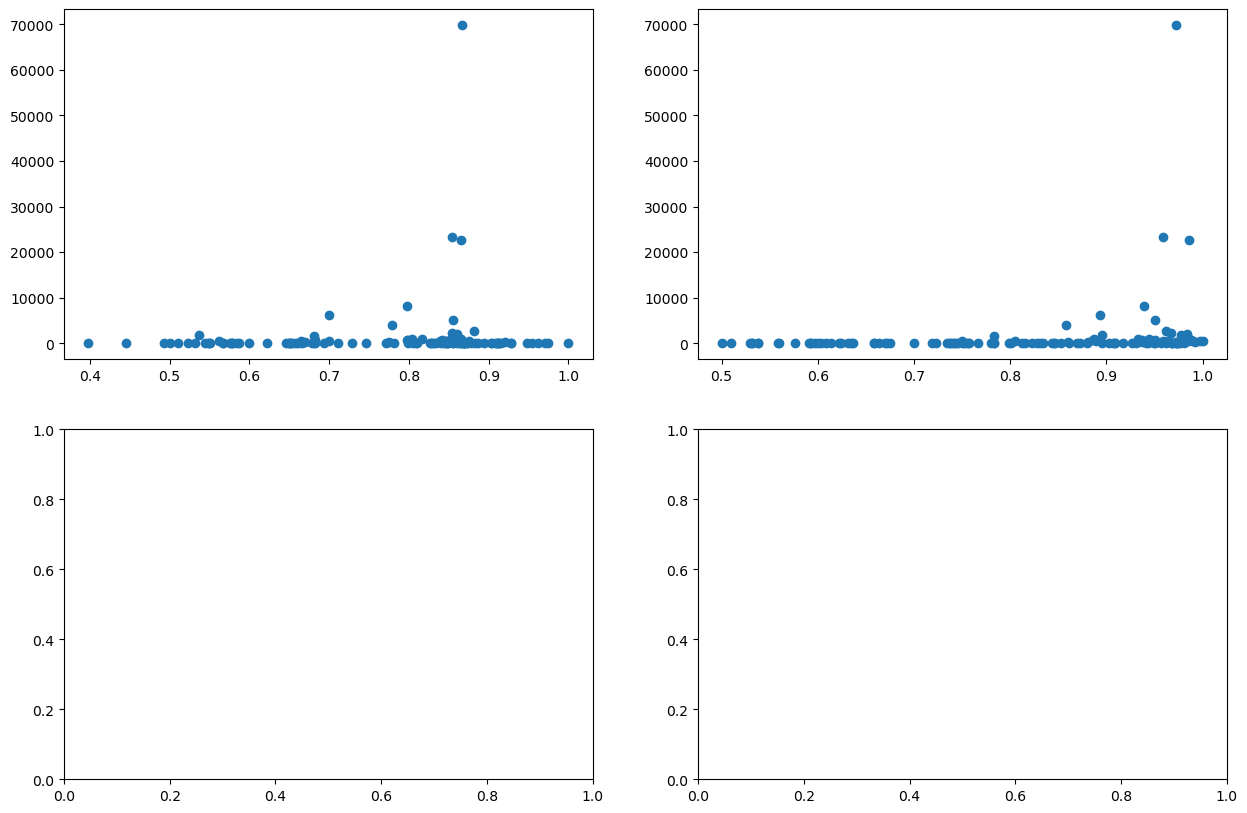

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
fig, ((ax1, ax2 ),(ax3)) = plt.subplots(2, 2)
ax1.scatter(X["Temperature"], y)
ax2.scatter(X["Humidity"], y)
ax3.scatter(X["Precipitation"], y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Splitting into test and training data

In [18]:
x_train, x_test, y_train, y_test = train_test_split( X , y , test_size=0.2, random_state =1)

In [19]:
x_train

,Temperature,Humidity,Precipitation
31,0.840957,0.988447,0.451216
59,0.577704,0.811989,0.001539
39,0.909421,0.750736,0.219452
113,0.860345,0.989755,0.586334
118,0.681309,0.783433,0.024007
...,...,...,...
109,0.621630,0.737766,0.016313
71,0.566495,0.756839,0.004001
79,0.852469,0.986376,0.324100
72,0.575583,0.658093,0.003386


In [20]:
x_test

,Temperature,Humidity,Precipitation
75,0.872463,0.783433,0.218221
35,0.599212,0.743215,0.000616
51,0.954559,0.631499,0.069868
5,0.886398,0.931226,0.283472
36,0.566798,0.658093,0.013543
120,0.550136,0.624632,0.000000
54,0.860042,0.973406,0.238535
17,0.867919,0.980926,0.434903
121,0.661315,0.613733,0.116959
119,0.561648,0.749973,0.032625


# Apply LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [22]:
## Training our model
fit = regressor.fit(x_train,y_train)

In [23]:
## Predicting values
y_pred = fit.predict(x_test)

In [24]:
## Comparing predicted against actual values
Comparing = pd.DataFrame({"Predicted": y_pred[:,0], "Actual": y_test[:,0]})
Comparing

,Predicted,Actual
0,1398.368111,8
1,66.330083,10
2,-75.124181,6
3,2226.343543,0
4,-53.513026,0
5,-221.475421,59
6,2064.377455,243
7,3387.198196,0
8,435.267551,25
9,329.590258,523


In [25]:
#30.63	73.31	7.98	
#regressor.predict([[30.63],[73.31],[7.98]])

# Accuracy check of our model

In [26]:
#accuracy check
score = regressor.score(x_test, y_test)
print(score)

-0.549772488385188


# Plot of the data with the line of best fit

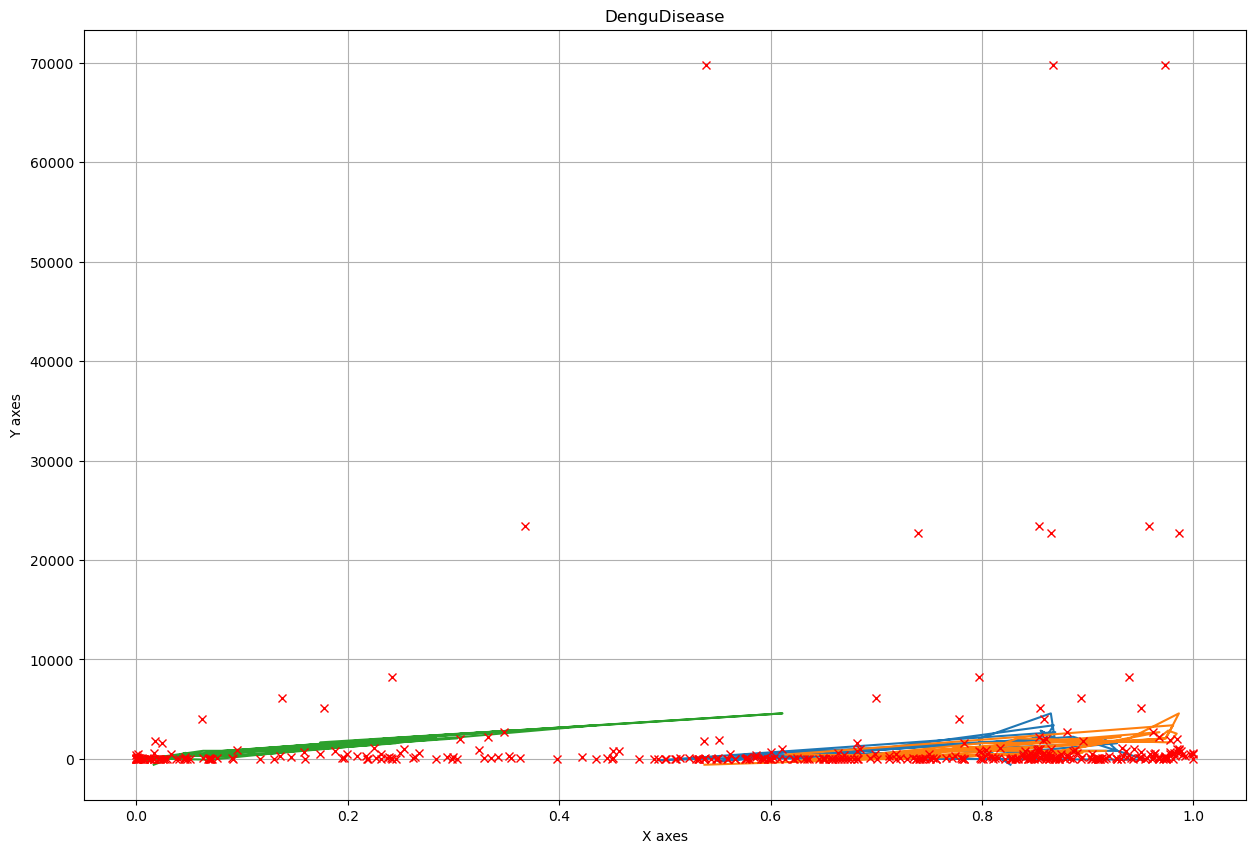

In [27]:
import matplotlib.pyplot as plt
plt.title('DenguDisease')
plt.xlabel('X axes')
plt.ylabel('Y axes')
plt.grid(True)
#plt.figure(figsize =(10,8))
plt.plot(x_test,y_pred)
plt.plot(X,y, "rx" )